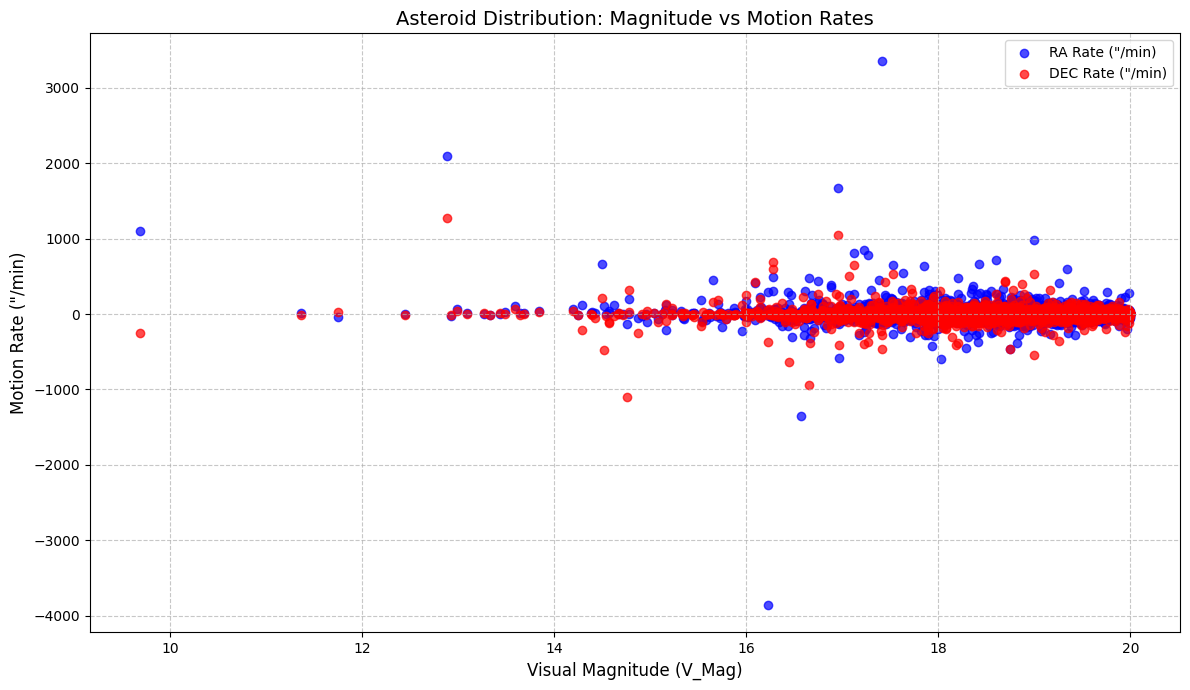

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define column names (correcting for possible header issues)
columns = ['Asteroid_ID', 'Timestamp', 'V_Mag', 'RA_Rate', 'DEC_Rate', 'Motion_Rate']

# Read the data file (replace 'asteroids.txt' with your actual filename)
df = pd.read_csv('all_valid_asteroids.txt', 
                 names=columns, 
                 skiprows=1, 
                 parse_dates=['Timestamp'])

# Group by Asteroid_ID and calculate mean values
grouped = df.groupby('Asteroid_ID').mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 7))

# Plot RA Rate vs V_Mag
plt.scatter(grouped['V_Mag'], grouped['RA_Rate'], 
            alpha=0.7, label='RA Rate ("/min)', color='blue')

# Plot DEC Rate vs V_Mag
plt.scatter(grouped['V_Mag'], grouped['DEC_Rate'], 
            alpha=0.7, label='DEC Rate ("/min)', color='red')

# Add labels and title
plt.xlabel('Visual Magnitude (V_Mag)', fontsize=12)
plt.ylabel('Motion Rate ("/min)', fontsize=12)
plt.title('Asteroid Distribution: Magnitude vs Motion Rates', fontsize=14)

# Add legend and grid
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

Number of unique asteroids: 7482
Average observations per asteroid: 6.00



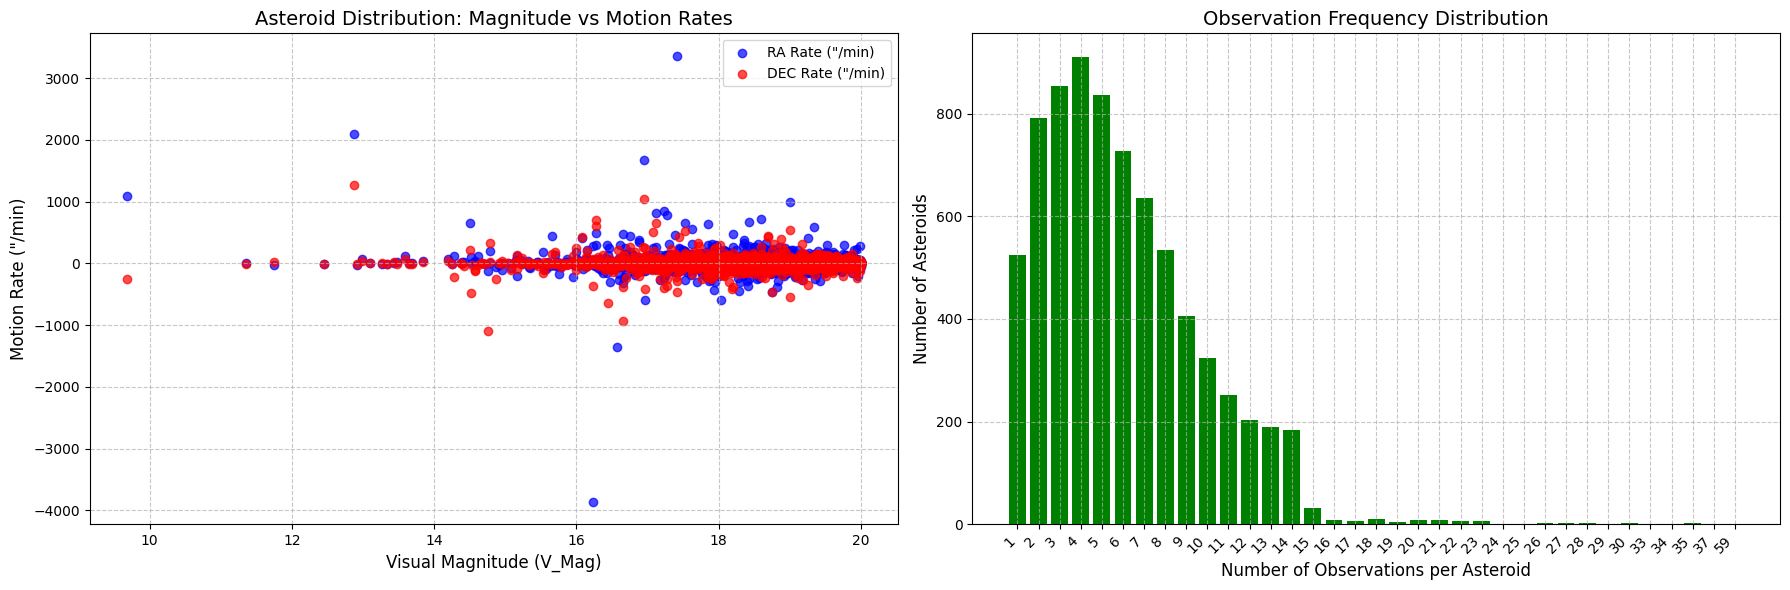

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define column names (correcting for possible header issues)
columns = ['Asteroid_ID', 'Timestamp', 'V_Mag', 'RA_Rate', 'DEC_Rate', 'Motion_Rate']

# Read the data file (replace 'asteroids.txt' with your actual filename)
df = pd.read_csv('all_valid_asteroids.txt', 
                 names=columns, 
                 skiprows=1, 
                 parse_dates=['Timestamp'])

# Calculate statistics
n_asteroids = df['Asteroid_ID'].nunique()
observation_counts = df['Asteroid_ID'].value_counts()
average_observations = observation_counts.mean()

# Print statistics
print(f"Number of unique asteroids: {n_asteroids}")
print(f"Average observations per asteroid: {average_observations:.2f}\n")

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# First plot: Magnitude vs Motion Rates
# Group by Asteroid_ID and calculate mean values
grouped = df.groupby('Asteroid_ID').mean().reset_index()

# Plot RA Rate vs V_Mag
ax1.scatter(grouped['V_Mag'], grouped['RA_Rate'], 
            alpha=0.7, label='RA Rate ("/min)', color='blue')

# Plot DEC Rate vs V_Mag
ax1.scatter(grouped['V_Mag'], grouped['DEC_Rate'], 
            alpha=0.7, label='DEC Rate ("/min)', color='red')

ax1.set_xlabel('Visual Magnitude (V_Mag)', fontsize=12)
ax1.set_ylabel('Motion Rate ("/min)', fontsize=12)
ax1.set_title('Asteroid Distribution: Magnitude vs Motion Rates', fontsize=14)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Second plot: Observation Distribution
count_distribution = observation_counts.value_counts().sort_index()
ax2.bar(count_distribution.index.astype(str), count_distribution.values, color='green')
ax2.set_xlabel('Number of Observations per Asteroid', fontsize=12)
ax2.set_ylabel('Number of Asteroids', fontsize=12)
ax2.set_title('Observation Frequency Distribution', fontsize=14)
ax2.grid(True, linestyle='--', alpha=0.7)

# Rotate x-labels for better visibility
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define column names
columns = ['Asteroid_ID', 'Timestamp', 'V_Mag', 'RA_Rate', 'DEC_Rate', 'Motion_Rate']

# Read the data file (replace 'asteroids.txt' with your actual filename)
df = pd.read_csv('all_valid_asteroids.txt', 
                 names=columns, 
                 skiprows=1, 
                 parse_dates=['Timestamp'])

# Calculate basic statistics
n_asteroids = df['Asteroid_ID'].nunique()
observation_counts = df['Asteroid_ID'].value_counts()
average_observations = observation_counts.mean()

# Print statistics
print(f"Number of unique asteroids: {n_asteroids}")
print(f"Average observations per asteroid: {average_observations:.2f}")
print(f"Total observation records: {len(df)}\n")

# Create main figure with subplots
fig = plt.figure(figsize=(20, 6))
gs = fig.add_gridspec(1, 3)

# First plot: Magnitude vs Motion Rates
ax1 = fig.add_subplot(gs[0, 0])
grouped = df.groupby('Asteroid_ID').mean().reset_index()
ax1.scatter(grouped['V_Mag'], grouped['RA_Rate'], alpha=0.7, label='RA Rate', color='blue')
ax1.scatter(grouped['V_Mag'], grouped['DEC_Rate'], alpha=0.7, label='DEC Rate', color='red')
ax1.set(xlabel='Visual Magnitude (V_Mag)', ylabel='Motion Rate ("/min)',
       title='Magnitude vs Motion Rates')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Second plot: Observation Distribution
ax2 = fig.add_subplot(gs[0, 1])
count_dist = observation_counts.value_counts().sort_index()
ax2.bar(count_dist.index.astype(str), count_dist.values, color='green')
ax2.set(xlabel='Observations per Asteroid', ylabel='Number of Asteroids',
       title='Observation Frequency Distribution')
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.grid(True, linestyle='--', alpha=0.7)

# Third plot: Observation Window Separation
ax3 = fig.add_subplot(gs[0, 2])

# Calculate time differences between consecutive observations
time_diffs = []
for _, group in df.groupby('Asteroid_ID'):
    if len(group) > 1:
        sorted_times = group.sort_values('Timestamp')['Timestamp']
        diffs = sorted_times.diff().dt.total_seconds() / 86400  # Convert to days
        time_diffs.extend(diffs.dropna().tolist())

# Create histogram with meaningful bins
bins = [0, 1, 2, 7, 30, 365, np.inf]
labels = ['Same day', '1 day', '2-6 days', '1 week-\n1 month', '1 month-\n1 year', '>1 year']

ax3.hist(time_diffs, bins=bins, edgecolor='black', alpha=0.7, color='purple')
ax3.set_xticks(bins[:-1])
ax3.set_xticklabels(labels, rotation=45, ha='right')
ax3.set(xlabel='Time Between Consecutive Observations', ylabel='Frequency',
       title='Observation Window Separation')
ax3.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Additional statistics for gaps
if len(time_diffs) > 0:
    print("Observation Gap Statistics:")
    print(f"Median gap: {np.median(time_diffs):.1f} days")
    print(f"Maximum gap: {np.max(time_diffs):.1f} days")
    print(f"Gaps >1 year: {len([x for x in time_diffs if x >= 365])}")
else:
    print("\nNo consecutive observation gaps to analyze")

FileNotFoundError: [Errno 2] No such file or directory: 'asteroids.txt'